### Tuning Observation

#### Load Dataset

In [17]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [18]:
# Load Dataset
path = './source/l1.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,7390.726635,7368.670382,6571.133851,7580.1430,7154.3604,7500.4854,7422.9053,6899.3740,7408.404767,9210.0
1,2023-09-08 02:39:25,7536.177200,7360.831983,5557.353517,7940.8857,7429.4300,7648.6570,7372.8213,7276.6245,7516.520443,5120.0
2,2023-09-08 02:39:30,7639.647900,7125.751017,4941.243137,7616.6800,7356.2964,7692.3640,7103.8940,7587.7847,7347.992762,7500.0
3,2023-09-08 02:39:35,7713.254942,6812.833747,4179.479375,7147.9985,7058.5435,7004.3210,6729.4400,6163.3755,6743.658715,7660.0
4,2023-09-08 02:39:40,7765.617558,6630.417978,3857.027503,6494.2670,6823.2515,6639.0327,6596.7530,6795.9990,5761.925218,6520.0


#### Find Pearson Correlation

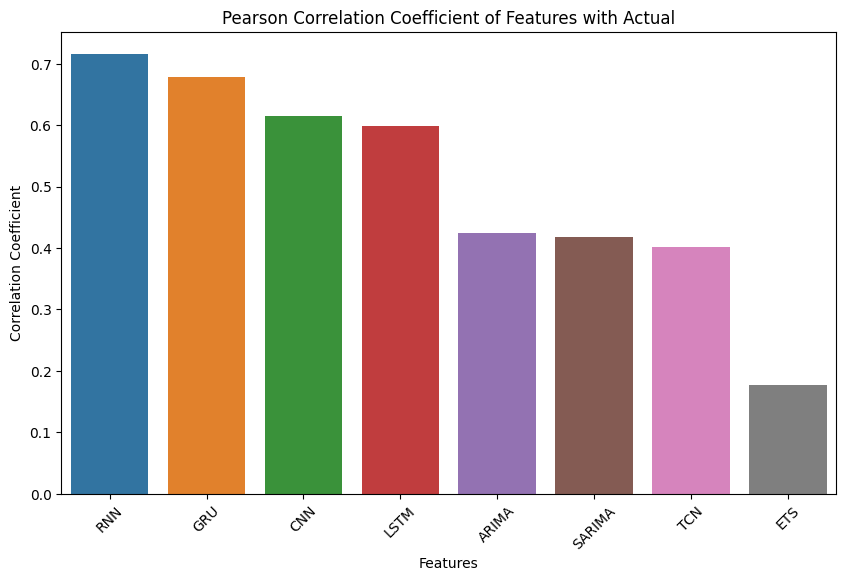

,Correlation with Actual
RNN,0.715803
GRU,0.677632
CNN,0.614538
LSTM,0.598597
ARIMA,0.425165
SARIMA,0.418597
TCN,0.402214
ETS,0.176964


In [19]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
correlation_target = 'Actual'
prediction_target = 'Raw'
rmse_target = 'Raw'
correlations = {feature: pearsonr(data[feature], data[correlation_target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=[f'Correlation with {correlation_target}'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted[f'Correlation with {correlation_target}'])
plt.title(f'Pearson Correlation Coefficient of Features with {correlation_target}')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [39]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [prediction_target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[prediction_target])
compare_rmse_column = data[rmse_target].dropna().iloc[500:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:500]
test_data = cleaned_data.iloc[500:]

#### Linear Regression

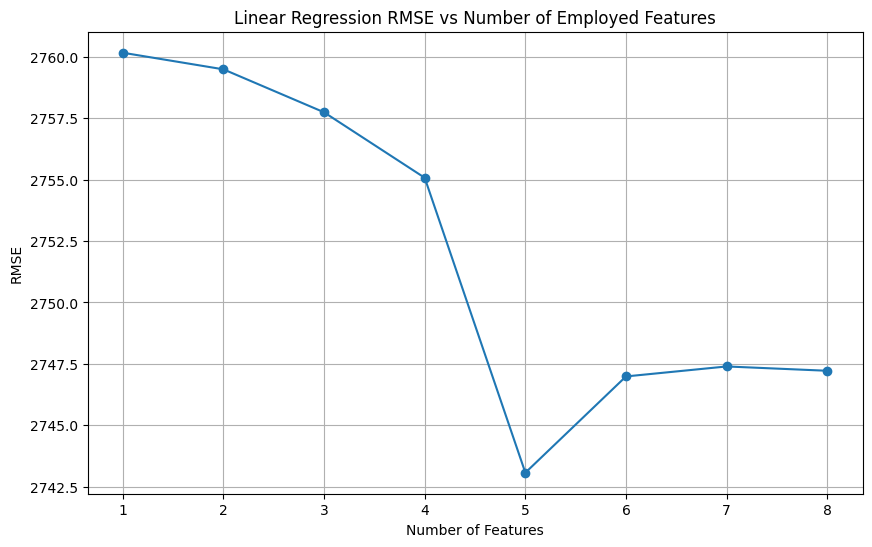

[2760.1710020190076,
 2759.49456207398,
 2757.7444374422266,
 2755.0777244000346,
 2743.063473978062,
 2746.985704259269,
 2747.391920494897,
 2747.2161340821026]

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('Linear Regression RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

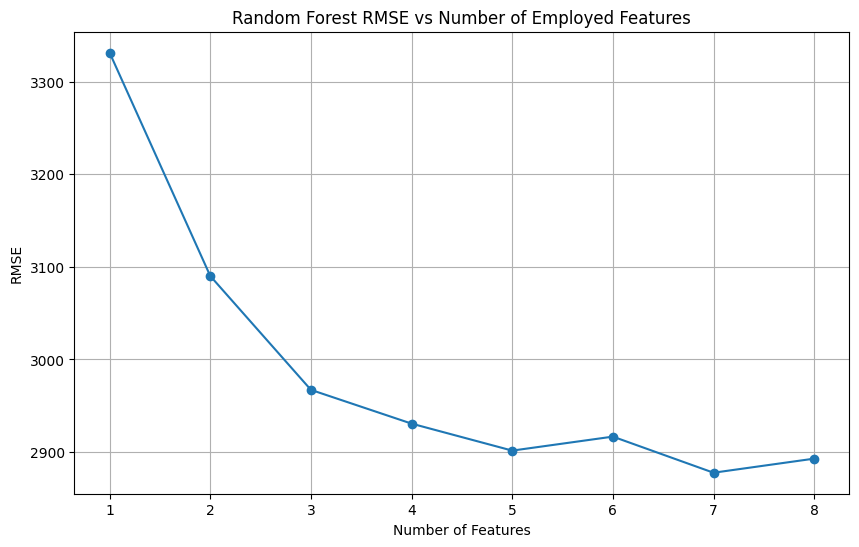

[3331.340350107849,
 3090.1889311004747,
 2967.2041975824195,
 2930.738573639803,
 2901.590811543199,
 2916.704114399249,
 2877.712152939788,
 2892.9265998460946]

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

24/24 [==============================] - 0s 2ms/step


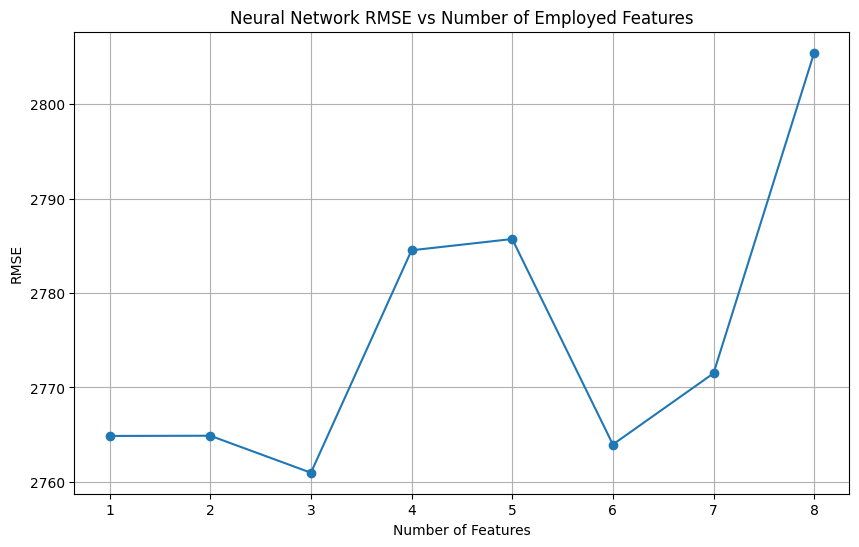

[2764.8666666532786,
 2764.890204144107,
 2760.97196693741,
 2784.529749606448,
 2785.722755898501,
 2763.9606194313465,
 2771.5006868086234,
 2805.4533529346054]

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(50, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(50, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values